# Week 8 - LDA and graph methods

Learning contents:

* FDA (2 classes)
    * Compute the class means (in PCA space)
    * Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$
    * Compute the projection vector $\mathbf{w}$
    * Compute and plot the 1D projection of the data
    * Compute the class separation of the projected values
* LDA (3 classes)
    * Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$
    * Compute the projection matrix $\mathbf{W}$
    * Compute and plot the 2D projection of the data
    * Compute the 2D LDA projection of the original 64D data 
* Extra: Laplacian Embedding
    * Create the 2D Laplacian Embedding of the swiss-roll dataset

In [3]:
# Dependencies
import numpy as np
import scipy
from sklearn.datasets import load_digits, make_swiss_roll
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set(); sns.set_palette('bright')

## Data
As usual, we'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [4]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [5]:
# Handy plotting functions

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap='rainbow')
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
def plot_scatter3d(data, targets, view_point=(25, 45), alpha=0.5, legend=True):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c=targets, cmap="rainbow", alpha=alpha)
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    ax.view_init(*view_point) # <- change viewpoint here
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.show()

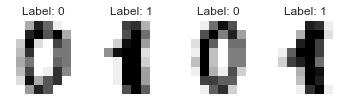

In [6]:
plot_examples()

In [7]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with
t = digits.target

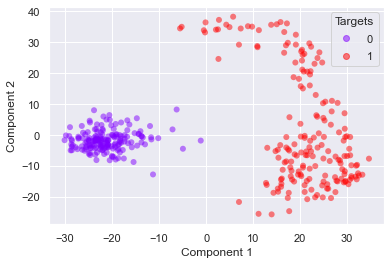

In [8]:
# Let's plot all the data in 2D
plot_scatter(X, t)

## 1) Fisher Discriminant Analysis (FDA)


### 1.1) Compute the class means (in PCA space)

### 1.2) Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$

### 1.3) Compute the projection vector $\mathbf{w}$
Hint: You can use `np.linalg.pinv` and `np.linalg.eig` for computing the pseudo-inverse and eigenvectors, respectively.
Also, remember to ensure that $||w||_2 = 1$

### 1.4) Compute and plot the 1D projection of the data
Hint: You can use `seaborn.displot` for a nice visualisation

### 1.5) Compute the class separation of the projected values

## 2) Linear Discriminant Analysis (LDA)

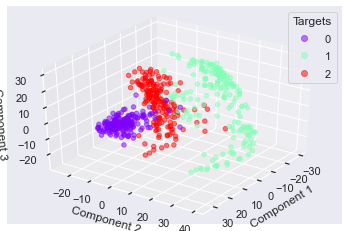

In [18]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=3)
X = pca.fit_transform(digits.data)
t = digits.target

plot_scatter3d(X, t, view_point=(35,35))

### 2.1) Compute the within-class scatter matrix $\mathbf{S}_W$ and between-class scatter matrix $\mathbf{S}_B$

### 2.2) Compute the projection matrix $\mathbf{W}$

### 2.3) Compute and plot the 2D projection of the data

### 2.4) Compute and plot the 2D LDA projection of the original 64D data 

In [9]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
X = digits.data
t = digits.target

Comment on the general utility of the projection as compared to PCA

## 3) Extra: Laplacian Embedding
We'll be working with the swiss-roll dataset

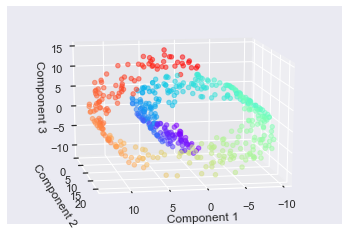

In [23]:
X, t = make_swiss_roll(500)
plot_scatter3d(X, t, view_point=(15,80), legend=False)

### 3.1) Create the 2D Laplacian Embedding of the dataset
Play with the sigma of the Gaussian kernel (start around $\sigma = 1.5$) to get a nice "boomerang"-looking shape

Hint: Omit the eigenvector corresponding to the largest eigenvalue